In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Sl.No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.isnull()

,Sl.No.,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [4]:
df.isnull().sum()

Sl.No.       0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

The dataset does not have any NaN values

In [5]:
df.dtypes

Sl.No.         int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Dataset has all float values.

In [6]:
(df.loc[0:]==" ").sum()

Sl.No.       0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Dataset does not have any null values 

In [7]:
(df.loc[0:]==0).sum()

Sl.No.       0
TV           0
radio        1
newspaper    0
sales        0
dtype: int64

Dataset has one features (radio) with value=0. Which is possible, when the radio channel had no contribution to sales.

# EDA

<AxesSubplot:xlabel='TV'>

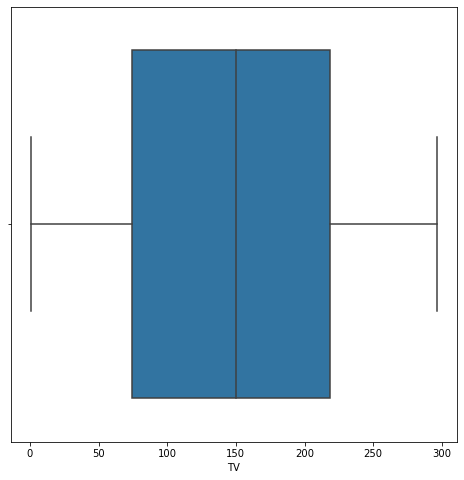

In [8]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df,x="TV")

50th percentile (median) for the TV channel = 150 

<AxesSubplot:xlabel='sales', ylabel='TV'>

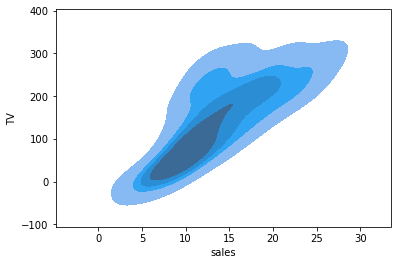

In [9]:
sns.kdeplot(data=df,x="sales",y="TV",levels=5,fill=True)

Higher density is noticed with Tv channels between 0-200 units and sales between 5-20 units

<AxesSubplot:xlabel='radio'>

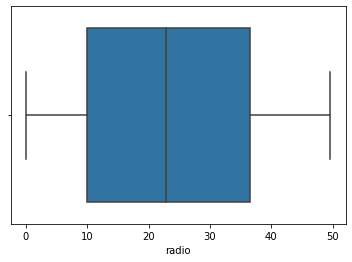

In [10]:
sns.boxplot(data=df,x="radio")

No evident outliers, 50th percentile is between 20-25

<AxesSubplot:xlabel='newspaper'>

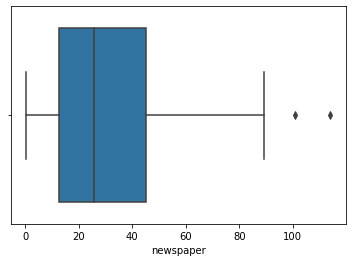

In [11]:
sns.boxplot(data=df,x="newspaper")

Newspaper channel seems to have a few outliers. 

<AxesSubplot:xlabel='TV', ylabel='sales'>

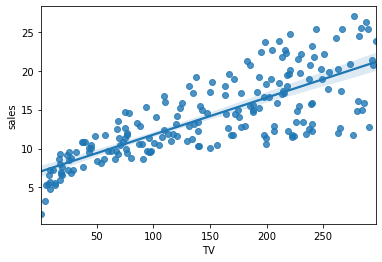

In [12]:
sns.regplot(data=df,x="TV",y="sales")

TV and sales have a linear approach. When the units of the TV channels have increased the sales has also followed.

The curve does have a y-intercept. 

<AxesSubplot:xlabel='radio', ylabel='sales'>

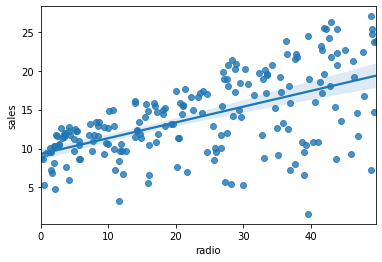

In [13]:
sns.regplot(data=df,x="radio",y="sales")

Radio and sales have a linear relationship. When the radio channel had units =0 the sales were close to 10 as the units on the channel increased there is an increase in the overall sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

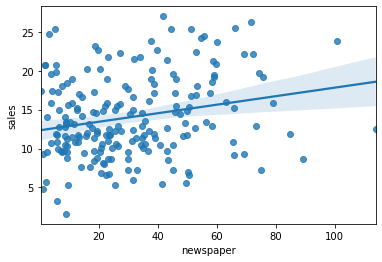

In [14]:
sns.regplot(data=df,x="newspaper",y="sales")

newspaper and sales also have a linear relationship. 

Worth noticing is the curve between newspaper and sales have a flatter curve when compaired with the curve between radio and sales. 

Likewise,the curve between radio and sales is flatter than the curve between TV and sales. 

Which indicates TV channels to be an effective means to increase sales when compared to radio or newspaper.

In [15]:
df=df.drop(["Sl.No."],axis=1)

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

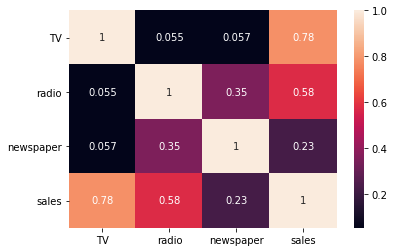

In [17]:
sns.heatmap(df.corr(),annot=True)

1. All features are positively correlated with sales. 


2. No multi-colinearity. 


3. TV has the highest correlation with sales (0.78). 


4. Newspaper has the least correlation (0.23).

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


No null values and features are float

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Checking for outliers and skewness

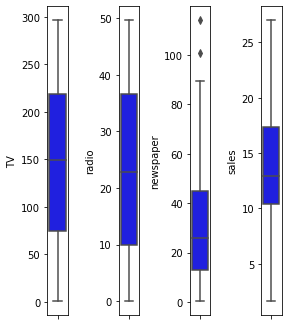

In [20]:
collist=df.columns.values
ncol=15 #no.of columns and rows to display the graphs i.e max col and max row
nrows=10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="blue",orient="v")
    plt.tight_layout()

Observations:
    
Newspaper has outliers. 

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Observation:
    
newspaper has skewness over 0.5.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

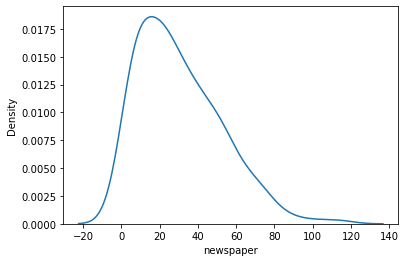

In [22]:
sns.kdeplot(data=df,x="newspaper")

<AxesSubplot:xlabel='TV', ylabel='Density'>

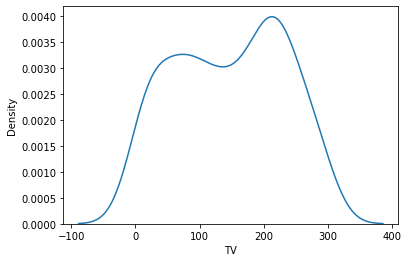

In [23]:
sns.kdeplot(data=df,x="TV")

<AxesSubplot:xlabel='radio', ylabel='Density'>

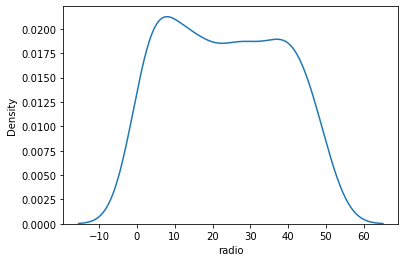

In [24]:
sns.kdeplot(data=df,x="radio")

<AxesSubplot:xlabel='sales', ylabel='Density'>

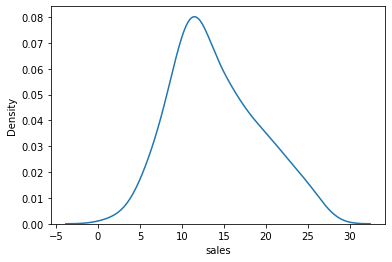

In [25]:
sns.kdeplot(data=df,x="sales")

Features do not show a normally distributed curve. 

# Data Cleaning 

In [26]:
import scipy 
from scipy.stats import zscore

In [27]:
z=np.abs(zscore(df)) 
z.shape

(200, 4)

In [28]:
threshold=3  #removing outliers 
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(198, 4)


In [29]:
#dataloss
loss=(200-198)/200*100
loss

1.0

Since the dataloss is less than 10% we can proceed.

In [30]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [31]:
#removing skewness

from sklearn.preprocessing import power_transform 
x=power_transform(x,method="yeo-johnson")

In [32]:
x_df=pd.DataFrame(data=x)
x_df.skew()

0   -0.320682
1   -0.236668
2   -0.101288
dtype: float64

All features have skewness between -0.5 - 0.5

# Preprocessing

In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler 

In [34]:
ss=StandardScaler()
x=ss.fit_transform(x)

# Linear Regression 

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split 

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [37]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_train=r2_score(pred_train,y_train)
    r2_test=r2_score(pred_test,y_test)
    print("Accuracy_train=",r2_train,"At random_state =",i)
    print("Accuracy_test=",r2_test,"At random_state =",i)
    print("\n")

Accuracy_train= 0.8904804356502445 At random_state = 0
Accuracy_test= 0.8995517052176802 At random_state = 0


Accuracy_train= 0.8981453316965802 At random_state = 1
Accuracy_test= 0.8945848152555803 At random_state = 1


Accuracy_train= 0.9065645892224968 At random_state = 2
Accuracy_test= 0.8449269806363064 At random_state = 2


Accuracy_train= 0.8936441876631787 At random_state = 3
Accuracy_test= 0.9040425441959381 At random_state = 3


Accuracy_train= 0.8986974112685383 At random_state = 4
Accuracy_test= 0.8769945124740702 At random_state = 4


Accuracy_train= 0.894344773014199 At random_state = 5
Accuracy_test= 0.8817747196879593 At random_state = 5


Accuracy_train= 0.8976645054572484 At random_state = 6
Accuracy_test= 0.8437881484495258 At random_state = 6


Accuracy_train= 0.8930836046305419 At random_state = 7
Accuracy_test= 0.8980924110849856 At random_state = 7


Accuracy_train= 0.8993605579515119 At random_state = 8
Accuracy_test= 0.8255028722519442 At random_state = 8


Ac

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=9,test_size=0.2)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
r2_train=r2_score(pred_train,y_train)
r2_test=r2_score(pred_test,y_test)
print("Accuracy_train=",r2_train)
print("Accuracy_test=",r2_test)

Accuracy_train= 0.8917945360163543
Accuracy_test= 0.9147812318725834


# Regularization

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso

In [ ]:
parameters={"alpha":[0.0001,.001,0.1,1,10],"random_state":list(range(0,100)),"max_iter":list(range(100,200)),"selection":["cyclic","random"]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [40]:
ls=Lasso(alpha=0.1,random_state=90,max_iter=100,selection="random",fit_intercept=True)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
lss=r2_score(y_test,pred_ls)
lss_train=r2_score(y_train,pred_train)
print("Test Accuracy = ",lss)
print("Train Accuracy = ",lss_train)

Test Accuracy =  0.9161428330070626
Train Accuracy =  0.901543863700018


In [41]:
for i in range(2,11):
    lss_cv=cross_val_score(ls,x,y,cv=i)
    lssc=lss_cv.mean()
    print("Score =",lssc*100,"at cv =",i)

Score = 90.14615075512133 at cv = 2
Score = 89.7234834599248 at cv = 3
Score = 89.80784403656428 at cv = 4
Score = 89.5780138287583 at cv = 5
Score = 89.8167014580228 at cv = 6
Score = 89.46420818070641 at cv = 7
Score = 89.8153283579087 at cv = 8
Score = 89.37135261966867 at cv = 9
Score = 89.55776414957968 at cv = 10


# Ensembling 

In [63]:
parameters={"loss":["linear","square","exponential"],"n_estimators":list(range(50,100))}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'loss': 'exponential', 'n_estimators': 60}


In [65]:
for i in range(1,100):
    ad=AdaBoostRegressor(loss="exponential",n_estimators=60,random_state=i)
    ad.fit(x_train,y_train)
    y_ad=ad.predict(x_test)
    r2_score(y_test,y_ad)
    print("Acc =", r2_score(y_test,y_ad),"RS=",i)

Acc = 0.9745120437755218 RS= 1
Acc = 0.9719601140489755 RS= 2
Acc = 0.971277094524645 RS= 3
Acc = 0.9705603272848252 RS= 4
Acc = 0.973264339471423 RS= 5
Acc = 0.9739826570105441 RS= 6
Acc = 0.9675850717300767 RS= 7
Acc = 0.9672753660566276 RS= 8
Acc = 0.9705962774929664 RS= 9
Acc = 0.9671000305223294 RS= 10
Acc = 0.9682968654666625 RS= 11
Acc = 0.9694721230801215 RS= 12
Acc = 0.9708910048936783 RS= 13
Acc = 0.9678101929450144 RS= 14
Acc = 0.973200774222603 RS= 15
Acc = 0.9732522868618831 RS= 16
Acc = 0.9730139229067568 RS= 17
Acc = 0.9687305501613209 RS= 18
Acc = 0.9655887788671894 RS= 19
Acc = 0.9703454540631894 RS= 20
Acc = 0.9705662483157657 RS= 21
Acc = 0.9730284690955011 RS= 22
Acc = 0.9731616840531367 RS= 23
Acc = 0.9711773102006701 RS= 24
Acc = 0.9700486137176187 RS= 25
Acc = 0.9682408143464087 RS= 26
Acc = 0.9679455632473791 RS= 27
Acc = 0.9695725228795262 RS= 28
Acc = 0.9702024163979931 RS= 29
Acc = 0.9691763872811763 RS= 30
Acc = 0.971492924760228 RS= 31
Acc = 0.9722131146053

In [84]:
ad=AdaBoostRegressor(loss="exponential",n_estimators=60,random_state=20)
ad.fit(x_train,y_train)
y_ad=ad.predict(x_test)
r2_score(y_test,y_ad)

0.9703454540631894

# DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
parameters={"criterion":["mse","friedman_mse","mae","poisson"],"splitter":["best","random"],"max_features":["auto","sqrt","log2"]}

decisionTreeRegressor = DecisionTreeRegressor()
clf=GridSearchCV(decisionTreeRegressor,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}


In [72]:
decisionTreeRegressor = DecisionTreeRegressor(criterion="mse",max_features="auto",splitter="best",random_state=50)
decisionTreeRegressor.fit(x_train,y_train)
y_pred = decisionTreeRegressor.predict(x_test)
r2_score(y_test,y_pred)

0.9710622300098807

# SVR

In [50]:
from sklearn.svm import SVR

In [74]:
parameters={"kernel":["linear","poly","rbf","sigmoid"],"gamma":["scale","auto"]}
svr = SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'linear'}


In [80]:
svr = SVR(gamma="scale",kernel="linear",C=25,degree=50)
svr.fit(x_train,y_train)
y_svr = svr.predict(x_test)
r2_score(y_test,y_svr)

0.9086957968219882

# Cross val score

Cross val for AdaBoost

In [81]:
from sklearn.model_selection import cross_val_score 
for i in range(2,11):
    rf_cv=cross_val_score(ad,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 95.25417818703208 at cv = 2
Score = 95.42091907544682 at cv = 3
Score = 95.64429207366612 at cv = 4
Score = 95.53333607287658 at cv = 5
Score = 95.63886365064334 at cv = 6
Score = 95.59256050905644 at cv = 7
Score = 95.57849633135417 at cv = 8
Score = 95.38497283624322 at cv = 9
Score = 95.35966154936185 at cv = 10


Cross val for DecisionTreeRegressor 

In [89]:
for i in range(2,11):
    rf_cv=cross_val_score(decisionTreeRegressor,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 91.79751337242449 at cv = 2
Score = 94.47607604340492 at cv = 3
Score = 94.01662977853492 at cv = 4
Score = 95.16226562989571 at cv = 5
Score = 93.92150327105678 at cv = 6
Score = 94.67551139975043 at cv = 7
Score = 94.69138191697436 at cv = 8
Score = 93.5323299044764 at cv = 9
Score = 95.19865658210784 at cv = 10


Cross val for SVR

In [82]:
for i in range(2,11):
    rf_cv=cross_val_score(svr,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 90.16756664977102 at cv = 2
Score = 89.49201459791941 at cv = 3
Score = 89.127625630614 at cv = 4
Score = 89.28312122027799 at cv = 5
Score = 89.27951127665638 at cv = 6
Score = 89.228754200679 at cv = 7
Score = 89.27674008550079 at cv = 8
Score = 88.77522419215124 at cv = 9
Score = 88.88582586145631 at cv = 10


At higher CV the cross val score is low and the accuracy of the svr model is lower than Ada boost

In [87]:
rf_cv=cross_val_score(ad,x,y,cv=5)
rfs=rf_cv.mean()
print("CV_Score =",rfs*100)
print("Accuracy_score =",r2_score(y_test,y_ad)*100)

CV_Score = 95.8261314492357
Accuracy_score = 97.03454540631894


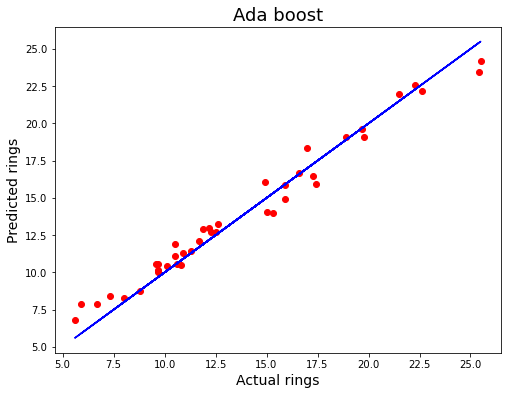

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_ad,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual rings",fontsize=14)
plt.ylabel("Predicted rings",fontsize=14)
plt.title("Ada boost",fontsize=18)
plt.show()

# Model Saving 

In [90]:
import pickle 
filename= "Ad.pkl"
pickle.dump(ad, open(filename,"wb"))

# Conclusion 

In [91]:
a=np.array(y_test)
predicted = np.array(ad.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,12.3,12.718182
1,16.6,16.664706
2,15.3,13.980000
3,9.7,10.140741
4,14.9,16.060000
5,10.8,10.500000
6,11.7,12.093750
7,7.3,8.400000
8,12.6,13.221429
9,10.1,10.424324
